### scikit-learnライブラリ
- 機械学習を実行するのに特化したライブラリ
  - 様々な機械学習方法を実行できる
  - 機械学習を適用するサンプルデータを使用することができる
  - 架空の自作サンプルデータを作り出すことができる
- scikit-learnをsklearnとして使うことが多い

### 機械学習
- 入力されたデータに基づいて，最も正しい振る舞いをするパラメータを自動的に学習する方法
- 機械学習ができること: 「分類」と「回帰」
    - 分類: どのデータがどの種類に属しているかを決める
    - 回帰: データの傾向を決める

### 教師あり学習
- 正解となる答えが含まれたデータに基づいて，学習させる方法
    - 答えとなる情報が付いたデータを「ラベル付きデータ」や「訓練データ」とよぶ
    - 学習後に検証する答え情報がないデータを「検証データ」や「テストデータ」とよぶ
- 教師あり学習を行うためには，訓練データで学習を行い，テストデータの正答率を高めることを行う

### 教師なし学習
- 与えられたデータの本質的な構造や法則を自動的に抽出する学習方法
  -  正解データを用意しないため，データの特徴を捉えることができる 

### scikit-learnを利用した自作データの作成
- from sklearn.datasets import make_○○ と importのように冒頭に記述することで，自作データを作成できる
    - 塊分布の自作データの場合: from sklearn.datasets import make_blob
    - 三日月分布の自作データの場合: from sklearn.datasets import make_moons
    - 二重円分布の自作データの場合: from sklearn.datasets import make_circles
    - 回帰用の自作データの場合: from sklearn.datasets import make_regression
- from sklearn.datasets import make_○○ を実行することで，

```python
変数1, 変数2 = make_○○(パラメータ)
```
- とすることで，変数1に特徴量が代入され，変数2に目的変数が代入される、データを作成できる
    - 特徴量と目的変数が紐づけられている大量データに基づいて，未知のデータの特徴量から目的変数を推測することが機械学習の基本的な考え方である
    - 変数1をX，変数2をy としていることが多い

### 乱数(random)の固定
   - 乱数を利用したプログラムは実行する度に結果は異なるが，サンプルデータが実行の度に毎回異なると使いづらいことがあるため，乱数のシード（種子）を固定をすることで，毎回同じランダムなデータを作成することができる
   - randomモジュールの場合: random.seed(数値) とすれば良い
        - ネットスラングである「乱数調整」は，都合の良いシードを求めることを意味する

In [1]:
# サンプル1: randomモジュールの場合
import random

# 冒頭にシードを固定する
random.seed(2) # シードを2にする

for i in range(5):
    print(random.randint(1, 6)) # 1以上6以下の整数をランダムに出力する

# シードを固定しているため，毎回同じ結果になる

1
1
1
3
2


In [2]:
# サンプル1: randomモジュールの場合
import random

# 冒頭にシードを固定する
random.seed(3) # シードを3にする

for i in range(5):
    print(random.randint(1, 6)) # 1以上6以下の整数をランダムに出力する

# シードを固定しているため，毎回同じ結果になる
# シードが2の時とが違う結果になる

2
5
5
2
3


In [3]:
# サンプル1: randomモジュールの場合
import random

for i in range(5):
    print(random.randint(1, 6)) # 1以上6以下の整数をランダムに出力する

# シードを決めていないため，毎回違う結果になる

5
4
6
5
1


In [4]:
# サンプル2: scikit-learnによる自作データの作成
from sklearn.datasets import make_blobs
import pandas as pd

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=2, # シードを2
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=100,  # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)
print(data)

           0          1
0   0.187576  -9.817153
1  -3.939551  -9.572928
2  -0.728648  -7.189267
3   0.273996  -1.876967
4   1.352383  -0.671332
..       ...        ...
95 -1.618924  -9.717659
96  0.524903  -2.548272
97 -1.683994 -10.865994
98 -1.280092  -8.939123
99  1.594765  -1.289893

[100 rows x 2 columns]


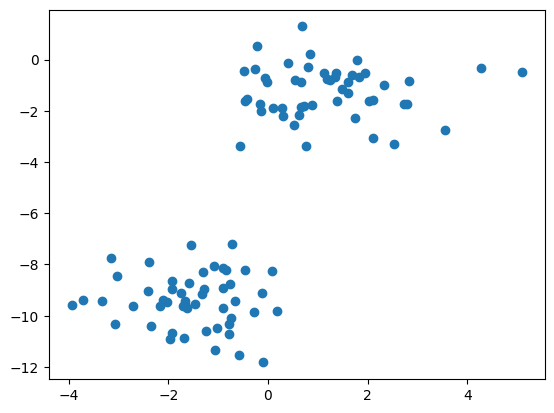

In [5]:
# サンプル2: scikit-learnによる自作データの作成
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=2, # シードを2
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=100,   # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 自作データの可視化
plt.scatter(data[0], data[1])
plt.show()

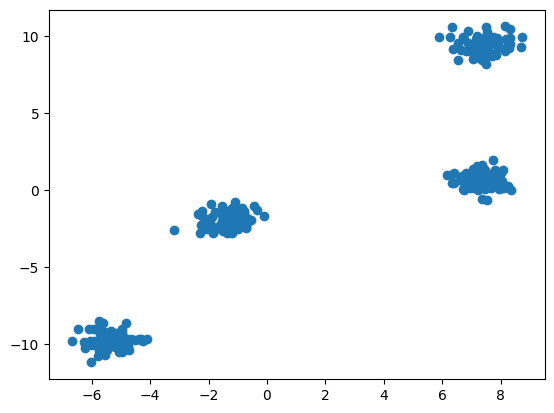

In [6]:
# サンプル2: scikit-learnによる自作データの作成
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

# 自作データの作成（パラメータを変更）
X, y = make_blobs(
    random_state=8,  # シードを8
    n_features=2,    # 特徴量を2次元
    centers=4,       # 目標を4つ（塊数: 4）
    cluster_std=0.5, # データの標準偏差を1
    n_samples=300,   # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 自作データの可視化
plt.scatter(data[0], data[1])
plt.show()

In [7]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_blobs
import pandas as pd

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=2, # シードを2
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=100,  # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

print(data)

# 0, 1の値から，targetの数値を予測することを行う

           0          1  target
0   0.187576  -9.817153       0
1  -3.939551  -9.572928       0
2  -0.728648  -7.189267       0
3   0.273996  -1.876967       1
4   1.352383  -0.671332       1
..       ...        ...     ...
95 -1.618924  -9.717659       0
96  0.524903  -2.548272       1
97 -1.683994 -10.865994       0
98 -1.280092  -8.939123       0
99  1.594765  -1.289893       1

[100 rows x 3 columns]


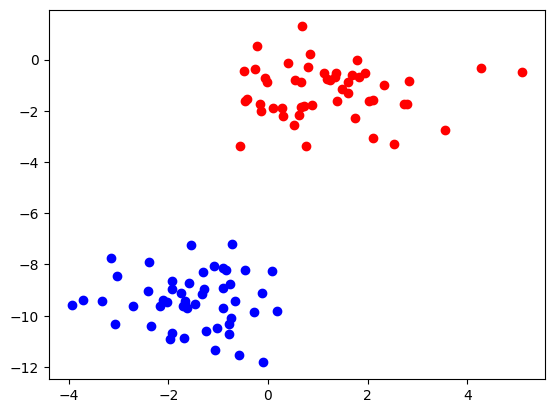

In [8]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_blobs
import pandas as pd

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=2, # シードを2
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=100,  # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示

plt.show()

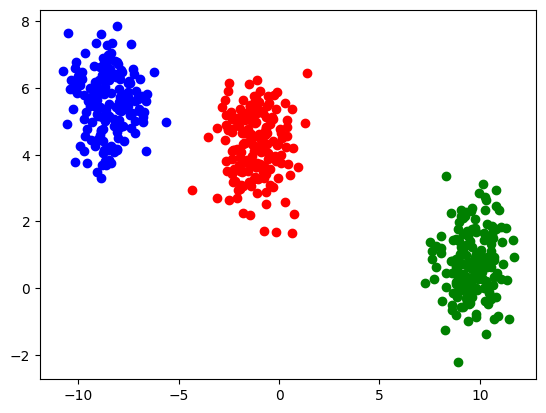

In [9]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_blobs
import pandas as pd

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=7, # シードを7
    n_features=2,   # 特徴量を2次元
    centers=3,      # 目標を3つ（塊を3つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=500,  # データ数を500
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に
data3 = data[data['target'] == 2] # dataのtargetが2のデータをdata3に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示
plt.scatter(data3[0], data3[1], color='g') # data3を緑で表示

plt.show()

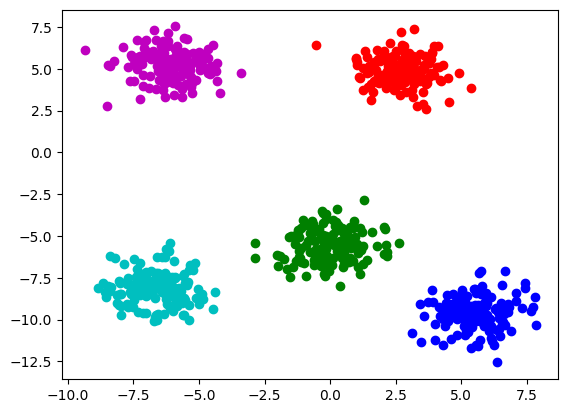

In [10]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_blobs
import pandas as pd

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=10, # シードを10
    n_features=2,    # 特徴量を2次元
    centers=5,       # 目標を5つ（塊を5つ）
    cluster_std=1,   # データの標準偏差を1
    n_samples=700,   # データ数を700
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に
data3 = data[data['target'] == 2] # dataのtargetが2のデータをdata3に
data4 = data[data['target'] == 3] # dataのtargetが3のデータをdata4に
data5 = data[data['target'] == 4] # dataのtargetが4のデータをdata5に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示
plt.scatter(data3[0], data3[1], color='g') # data3を緑で表示
plt.scatter(data4[0], data4[1], color='m') # data3を赤紫で表示
plt.scatter(data5[0], data5[1], color='c') # data3をシアンで表示

plt.show()

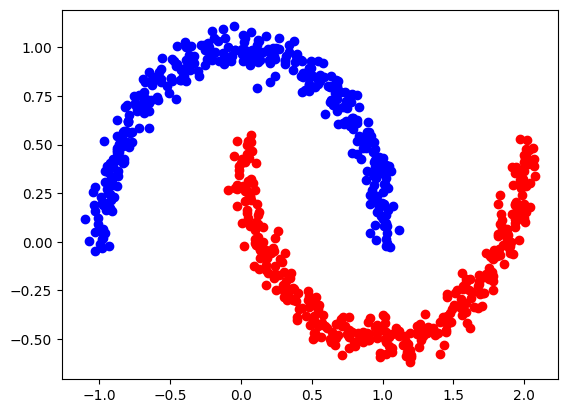

In [11]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_moons
import pandas as pd

# 三日月分布の自作データの作成
X, y = make_moons(
    random_state=10, # シードを10
    noise=0.05,       # ノイズの度合いを0.05
    n_samples=700,   # データ数を700
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示

plt.show()

# 三日月分布は直線で分割できないデータとなる

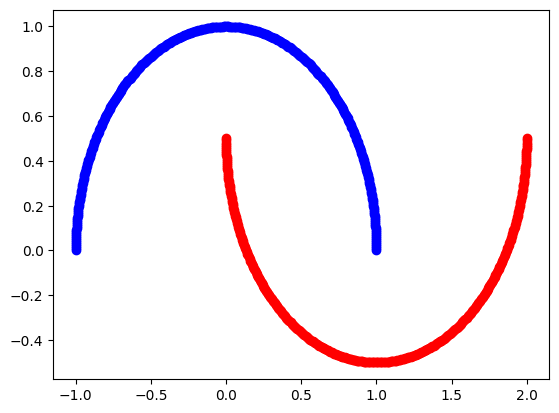

In [12]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_moons
import pandas as pd

# 三日月分布の自作データの作成
X, y = make_moons(
    random_state=10, # シードを10
    noise=0,         # ノイズの度合いを0
    n_samples=700,   # データ数を700
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示

plt.show()

# 三日月分布は直線で分割できないデータとなる

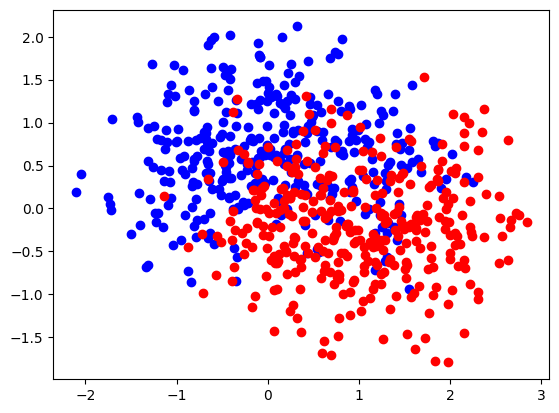

In [13]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_moons
import pandas as pd

# 三日月分布の自作データの作成
X, y = make_moons(
    random_state=10, # シードを10
    noise=0.5,       # ノイズの度合いを0.5
    n_samples=700,   # データ数を700
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示

plt.show()

# 三日月分布は直線で分割できないデータとなる

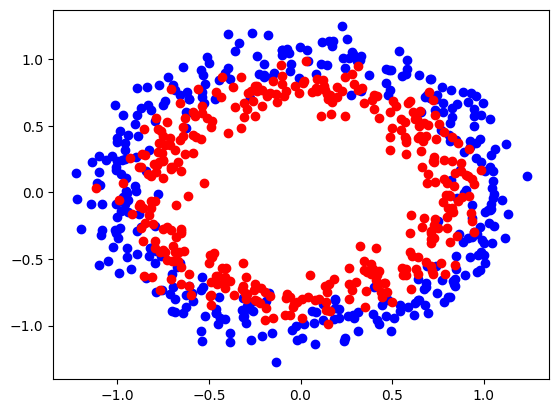

In [14]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_circles
import pandas as pd

# 二重円分布の自作データの作成
X, y = make_circles(
    random_state=10, # シードを10
    noise=0.1,       # ノイズの度合いを0.1
    n_samples=700,   # データ数を700
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示

plt.show()

# 二重円分布は直線で分割できないデータとなる

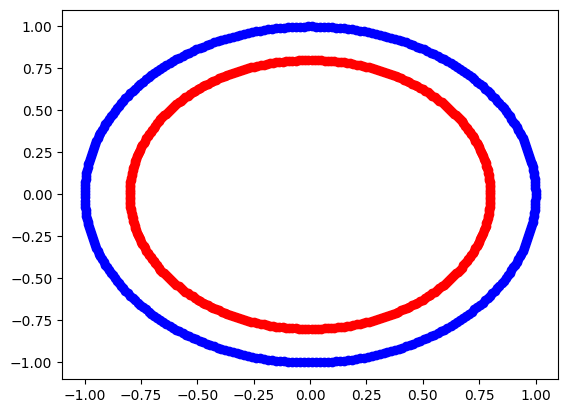

In [15]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_circles
import pandas as pd

# 二重円分布の自作データの作成
X, y = make_circles(
    random_state=10, # シードを10
    noise=0,         # ノイズの度合いを0
    n_samples=700,   # データ数を700
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示

plt.show()

# 二重円分布は直線で分割できないデータとなる

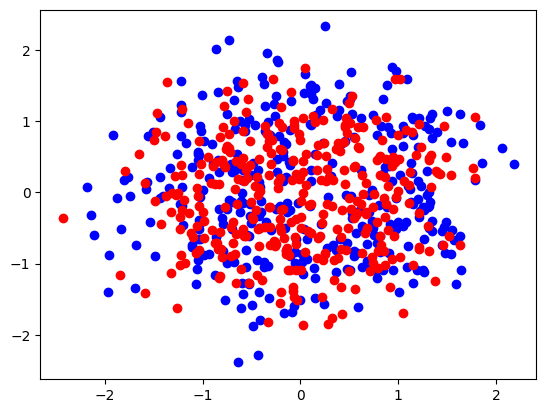

In [16]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_circles
import pandas as pd

# 二重円分布の自作データの作成
X, y = make_circles(
    random_state=10, # シードを10
    noise=0.5,       # ノイズの度合いを0.5
    n_samples=700,   # データ数を700
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示

plt.show()

# 二重円分布は直線で分割できないデータとなる

In [17]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_regression
import pandas as pd

# 回帰用の自作データの作成
# 特徴量が1のときは直線上に分布するデータになる
X, y = make_regression(
    random_state=10, # シードを10
    n_features=1,    # 特徴量1つ
    noise=1,         # ノイズの度合いを1
    bias=10,         # 切片を10「特徴量0が0のときの値」
    n_samples=100,   # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

print(data)

           0
0  -1.136602
1  -1.418556
2   1.744814
3  -0.232182
4  -0.489337
..       ...
95  2.384967
96  0.565153
97  0.917459
98  1.107708
99 -0.539879

[100 rows x 1 columns]


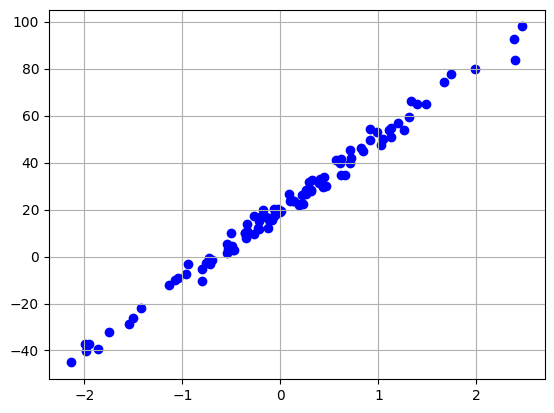

In [18]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_regression
import pandas as pd

# 回帰用の自作データの作成
# 特徴量が1のときは直線上に分布するデータになる
X, y = make_regression(
    random_state=10, # シードを10
    n_features=1,    # 特徴量1つ
    noise=3,         # ノイズの度合いを3
    bias=20,         # 切片を20「特徴量0が0のときの値」
    n_samples=100,   # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 「特徴量0」と「y」で散布図プロット
plt.scatter(data[0], y, color='b')
plt.grid() # グリッド表示
plt.show()

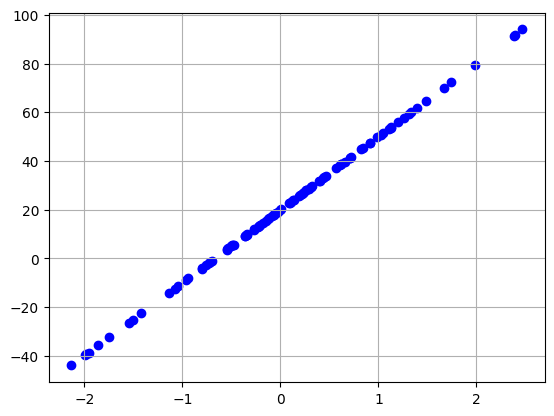

In [19]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_regression
import pandas as pd

# 回帰用の自作データの作成
# 特徴量が1のときは直線上に分布するデータになる
X, y = make_regression(
    random_state=10, # シードを10
    n_features=1,    # 特徴量1つ
    noise=0,         # ノイズの度合いを0
    bias=20,         # 切片を20「特徴量0が0のときの値」
    n_samples=100,   # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 「特徴量0」と「y」で散布図プロット
plt.scatter(data[0], y, color='b')
plt.grid() # グリッド表示
plt.show()

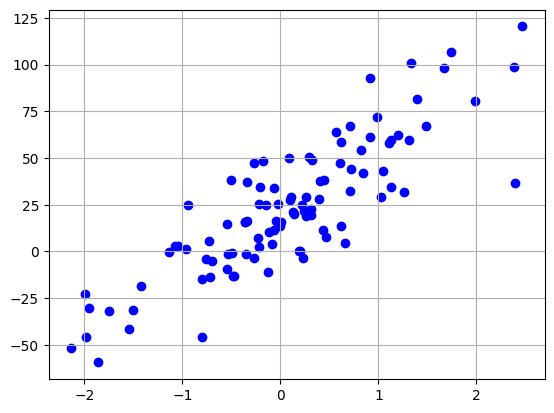

In [20]:
# サンプル3: scikit-learnによる自作データの作成
from sklearn.datasets import make_regression
import pandas as pd

# 回帰用の自作データの作成
# 特徴量が1のときは直線上に分布するデータになる
X, y = make_regression(
    random_state=10, # シードを10
    n_features=1,    # 特徴量1つ
    noise=20,        # ノイズの度合いを20
    bias=20,         # 切片を20「特徴量0が0のときの値」
    n_samples=100,   # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 「特徴量0」と「y」で散布図プロット
plt.scatter(data[0], y, color='b')
plt.grid() # グリッド表示
plt.show()

### 機械学習の流れ
1. データを用意する
2. 「訓練データ」と「テストデータ」に分割する
3. 訓練データで学習を行う
4. 学習後のモデルでテストデータに適用して，精度を算出する
5. 結果を可視化する
    - 今回は1〜3について行う，次回は4〜5を行う 

### データフレーム変数の先頭表示
- データフレーム変数.head() とすることで，先頭の5個を表示することができる

In [21]:
# サンプル4: headの使い方
from sklearn.datasets import make_blobs
import pandas as pd

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=2, # シードを2
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=100,   # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

print(data.head())

          0         1  target
0  0.187576 -9.817153       0
1 -3.939551 -9.572928       0
2 -0.728648 -7.189267       0
3  0.273996 -1.876967       1
4  1.352383 -0.671332       1


### matplotlibでグラフを並べる方法
- plt.subplot()を使用することで，一つの図の中にグラフを追加できる
    - 流れ
        1. plt.subplot()でグラフを描く場所を指定
        2. plt.plot()でグラフを作成
        3. plt.subplot()でグラフを書く別の各場所を指定
        4. plt.plot()でグラフを作成
        5. これを繰り返す
- plt.subplot(ABC)と書く
    - A, B, C：それぞれ一桁の正の整数
    - 図を縦にA個，横にB個に分割を行う
    - 左上から数えてC番目の領域を指定

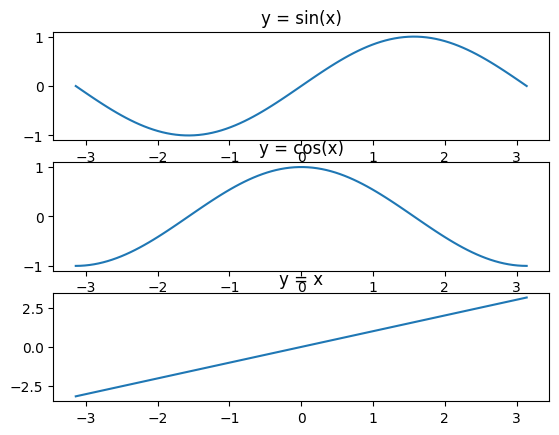

In [22]:
# サンプル5: subplotの使い方
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(311) # 縦に3分割，横に1分割し，一番上の領域を指定する
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
plt.title('y = sin(x)')
plt.plot(x, y)

plt.subplot(312) # 縦に3分割，横に1分割し，真ん中の領域を指定する
y = np.cos(x)
plt.title('y = cos(x)')
plt.plot(x, y)

plt.subplot(313) # 縦に3分割，横に1分割し，一番の領域を指定する
y = x
plt.title('y = x')
plt.plot(x, y)

plt.show()

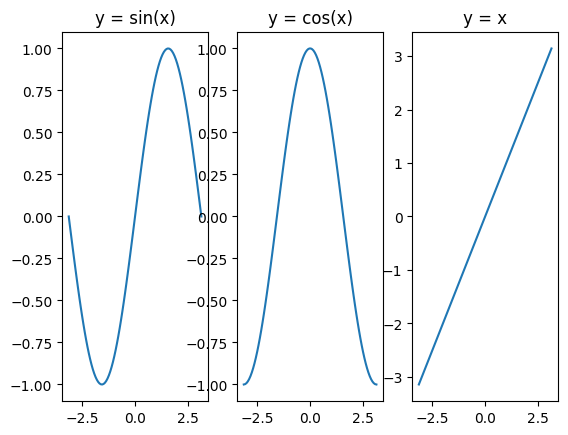

In [23]:
# サンプル5: subplotの使い方
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(131) # 縦に1分割，横に3分割し，一番左の領域を指定する
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
plt.title('y = sin(x)')
plt.plot(x, y)

plt.subplot(132) # 縦に1分割，横に3分割し，真ん中の領域を指定する
y = np.cos(x)
plt.title('y = cos(x)')
plt.plot(x, y)

plt.subplot(133) # 縦に1分割，横に3分割し，一番右の領域を指定する
y = x
plt.title('y = x')
plt.plot(x, y)

plt.show()

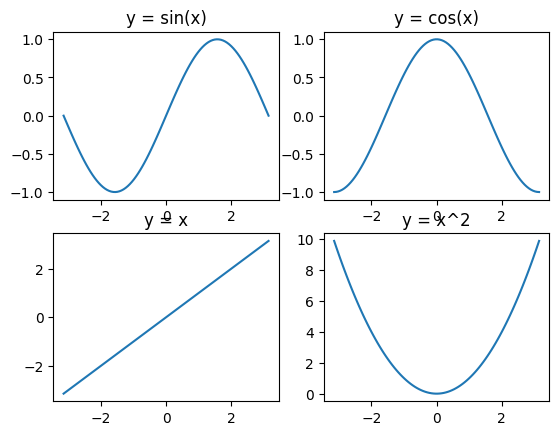

In [24]:
# サンプル5: subplotの使い方
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(221) # 縦に2分割，横に2分割し，左上の領域を指定する
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
plt.title('y = sin(x)')
plt.plot(x, y)

plt.subplot(222) # 縦に2分割，横に2分割し，右上の領域を指定する
y = np.cos(x)
plt.title('y = cos(x)')
plt.plot(x, y)

plt.subplot(223) # 縦に2分割，横に2分割し，左下の領域を指定する
y = x
plt.title('y = x')
plt.plot(x, y)

plt.subplot(224) # 縦に2分割，横に2分割し，右下の領域を指定する
y = x*x
plt.title('y = x^2')
plt.plot(x, y)

plt.show()

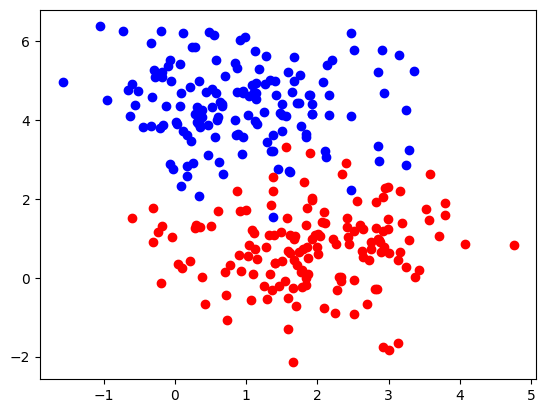

In [25]:
# 機械学習の流れ1: データの生成
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# 目標数でデータを分ける
data1 = data[data['target'] == 0]
data2 = data[data['target'] == 1]

# 可視化を行う
plt.scatter(data1[0], data1[1], color='b')
plt.scatter(data2[0], data2[1], color='r')

plt.show()

### 訓練データとテストデータに分割する
- from sklearn.model_selection import train_test_split を冒頭に書き，
```python
変数1, 変数2, 変数3, 変数4 = train_test_split(変数5, 変数6, test_size=テストデータ割合（小数値）, random_state=シード値)
```
- とすることで，変数5を変数1と変数2に分割する（変数2が指定した割合となる），変数6を変数3と変数4に分割する（変数4が指定した割合となる）

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=テストデータ割合（小数値）, random_state=シード値)
```
- で書かれることが多い
    - X: 生成データの特徴量
    - X_train: 特徴量（訓練データ用）
    - X_test:  特徴量（テストデータ用）
    - y:       生成データの目的変数
    - y_train: 目的変数（訓練データ用）
    - y_test:  目的変数（テストデータ用）  

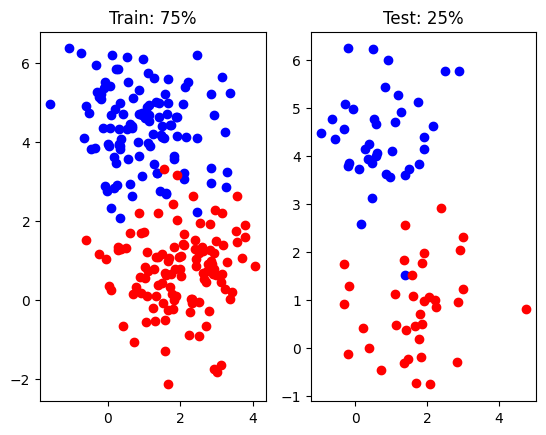

In [26]:
# 機械学習の流れ2: 生成データを訓練データとテストデータに分割
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，訓練データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 訓練データの可視化
plt.subplot(121)
# 訓練データをデータフレーム(pandas)に落とし込む
train_data = pd.DataFrame(X_train)
train_data['target'] = y_train

# 目標数でデータを分ける
train_data1 = train_data[train_data['target'] == 0]
train_data2 = train_data[train_data['target'] == 1]

# 可視化を行う
plt.scatter(train_data1[0], train_data1[1], color='b')
plt.scatter(train_data2[0], train_data2[1], color='r')
plt.title('Train: 75%')

# テストデータの可視化
plt.subplot(122)
# テストデータをデータフレーム(pandas)に落とし込む
test_data = pd.DataFrame(X_test)
test_data['target'] = y_test

# 目標数でデータを分ける
test_data1 = test_data[test_data['target'] == 0]
test_data2 = test_data[test_data['target'] == 1]

# 可視化を行う
plt.scatter(test_data1[0], test_data1[1], color='b')
plt.scatter(test_data2[0], test_data2[1], color='r')
plt.title('Test: 25%')

plt.show()

### 訓練データの学習
- 今回はサポートベクターマシン(SVM)で機械学習を行う

### サポートベクターマシン(Support Vector Machine, SVM)
- データを最も引き離す｢境界｣を作成する
    - 2次元データの場合，データを分割する境界線を引く
- scikit-learnを利用することで，以下のプログラムで，訓練データでSVMを実行できる
    - from sklearn import svm を冒頭に書くことで，サポートベクターマシンを扱うプログラムを実行できる
```
from sklearn import svm

# サポートベクターマシンモデルを作成する
SVMモデル変数 = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
SVMモデル変数.fit(訓練データ用の特徴量変数, 訓練データ用の目的変数)  
```

```
# 具体例
from sklearn import svm

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train)  
```

- 数行で機械学習を実行できるため，scikit-learnが利用されることが多い

In [27]:
# 機械学習の流れ3: 機械学習の実行
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm

import pandas as pd
import matplotlib.pyplot as plt

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を100
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，訓練データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

SVC()

### 演習問題
1. サンプルプログラムを参考にし，「シードを7」，「ノイズの度合いを0.1」「データ数を500」と設定を行った｢三日月分布のデータ｣を作成し，目的変数の違いがわかるように散布図で可視化をせよ．
2. 1で作成したデータに対して，訓練データが80%，テストデータが20%になるように分割し（シードを0とする），分割した訓練データとテストデータを可視化せよ．（サンプルプログラムを参考にして，横に2つ並べなさい．）
3. サンプルプログラムを参考にし，「シードを5」，「ノイズの度合いを0.05」「データ数を400」と設定行った｢二重円分布分布のデータ｣を作成し，目的変数の違いがわかるように散布図で可視化をせよ．
4. 3で作成したデータに対して，訓練データが90%，テストデータが10%になるように分割し（シードを0とする），分割した訓練データとテストデータを可視化せよ．（サンプルプログラムを参考にして，横に2つ並べなさい．）